In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/VN-covid-data.csv', parse_dates=['date'])

In [3]:
start_date = pd.Timestamp(datetime.date(2021, 7, 1)) 

df = df[df['date'] >= start_date].copy()
df.head()

iso_code continent location       date  total_cases  new_cases  \
525      VNM      Asia  Vietnam 2021-07-01      17727.0      675.0   
526      VNM      Asia  Vietnam 2021-07-02      18121.0      394.0   
527      VNM      Asia  Vietnam 2021-07-03      19310.0     1189.0   
528      VNM      Asia  Vietnam 2021-07-04      20261.0      951.0   
529      VNM      Asia  Vietnam 2021-07-05      21312.0     1051.0   

     new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
525             486.286          81.0         0.0                1.286  ...   
526             512.000          84.0         3.0                1.429  ...   
527             569.286          84.0         0.0                1.429  ...   
528             645.857          86.0         2.0                1.429  ...   
529             739.429          90.0         4.0                1.714  ...   

     extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
525              2.0                245.465                  6.0   
526              2.0                245.465                  6.0   
527              2.0                245.465                  6.0   
528              2.0                245.465                  6.0   
529              2.0                245.465                  6.0   

     female_smokers  male_smokers  handwashing_facilities  \
525             1.0          45.9                  85.847   
526             1.0          45.9                  85.847   
527             1.0          45.9                  85.847   
528             1.0          45.9                  85.847   
529             1.0          45.9                  85.847   

     hospital_beds_per_thousand  life_expectancy  human_development_index  \
525                         2.6             75.4                    0.704   
526                         2.6             75.4                    0.704   
527                         2.6             75.4                    0.704   
528                         2.6             75.4                    0.704   
529                         2.6             75.4                    0.704   

     excess_mortality  
525               0.0  
526               0.0  
527               0.0  
528               0.0  
529               0.0  

[5 rows x 62 columns]

In [4]:
df['new_deaths_ma3'] = df['new_deaths'].rolling(window=3, center=False).mean()
df['new_deaths_ewma'] = df['new_deaths'].ewm(halflife=3, ignore_na=False, min_periods=0, adjust=True).mean()

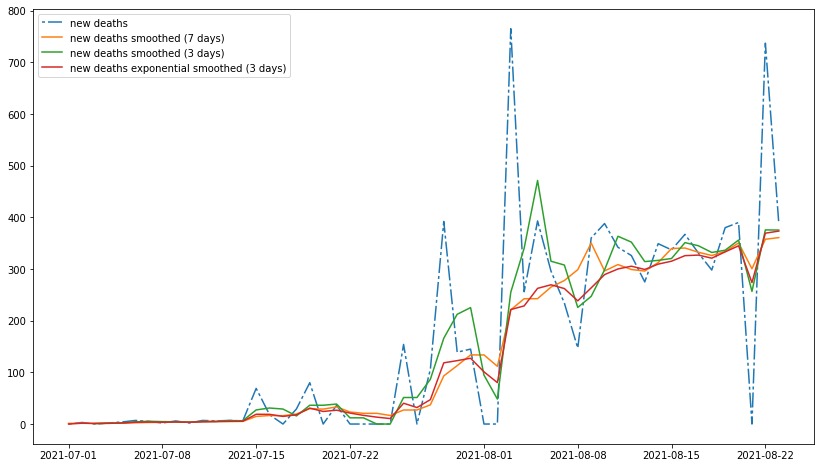

In [6]:
fig, ax = plt.subplots(figsize=(14, 8))

line1, = ax.plot(df.date, df.new_deaths, label='new deaths')
line1.set_dashes([2, 2, 10, 2]) 

line2, = ax.plot(df.date, df.new_deaths_smoothed, label='new deaths smoothed (7 days)')
line3, = ax.plot(df.date, df.new_deaths_ma3, label='new deaths smoothed (3 days)')
line4, = ax.plot(df.date, df.new_deaths_ewma, label='new deaths exponential smoothed (3 days)')

ax.legend()
plt.show()